In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')

<Axes: xlabel='GrLivArea'>

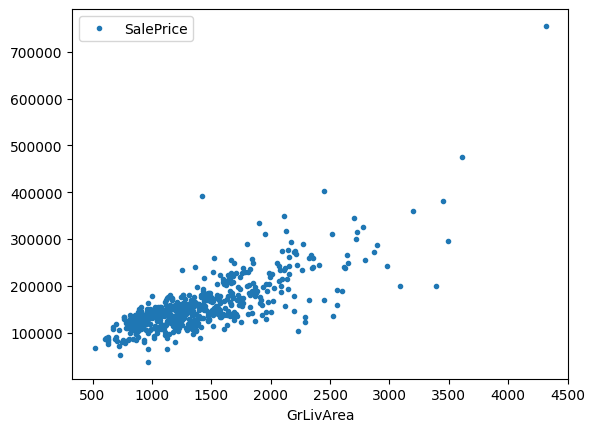

In [3]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [4]:
#Linear rigression
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m_calc = (n * sum_xy - sum_x * sum_y) / denominator
b_calc = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print(m_calc, b_calc)

87.6881454948481 34754.077891844456


In [5]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [6]:
def model(x,m,b):
    return m * x + b
def loss(x,y,m,b):
    y_predicted = model(x,m,b)
    return np.power( y - y_predicted, 2 )/len(y)

def updated_m(x,y,m,b,learning_rate):
    dL_dm = - 2 * x * (y - model(x,m,b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
    dL_db = - 2 * (y - model(x,m,b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db


training with batch_size=32, learning_rate_m=1e-07 and learning_rate_b=0.01
18


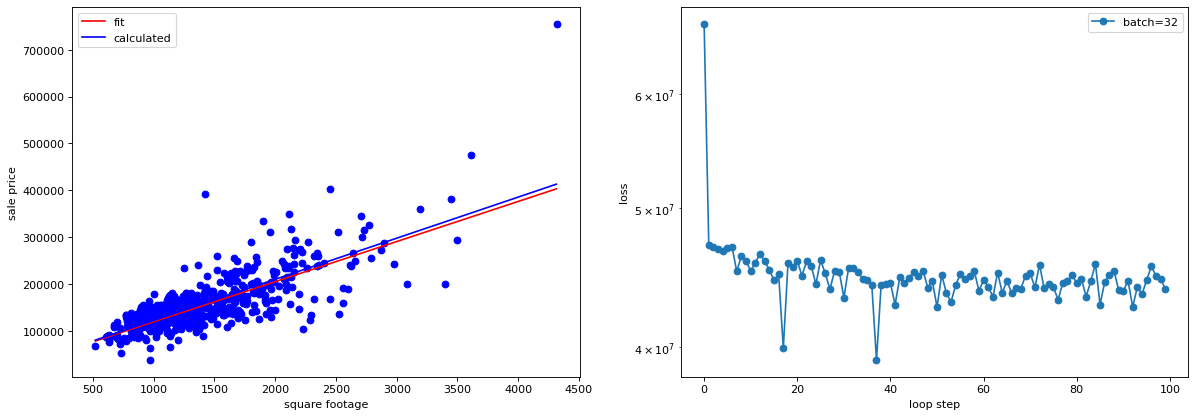

training with batch_size=64, learning_rate_m=1e-07 and learning_rate_b=0.01
9


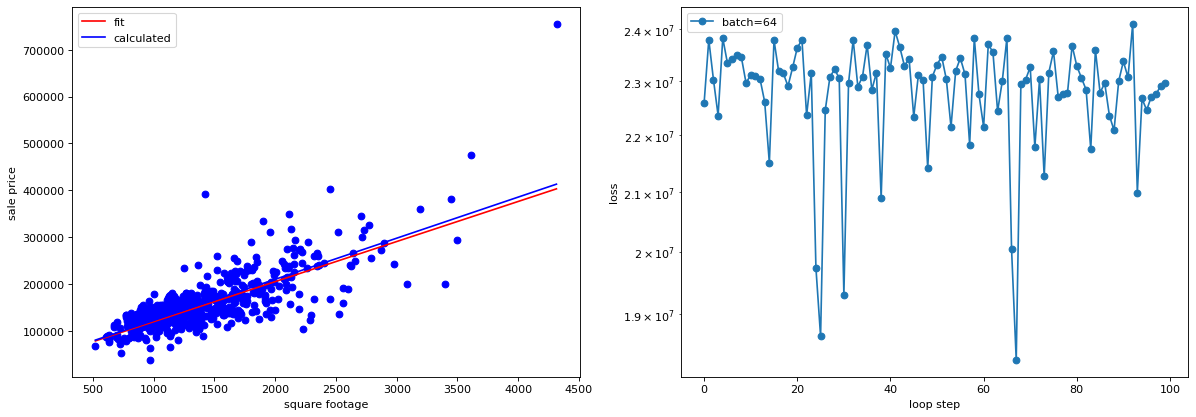

training with batch_size=128, learning_rate_m=1e-07 and learning_rate_b=0.01
5


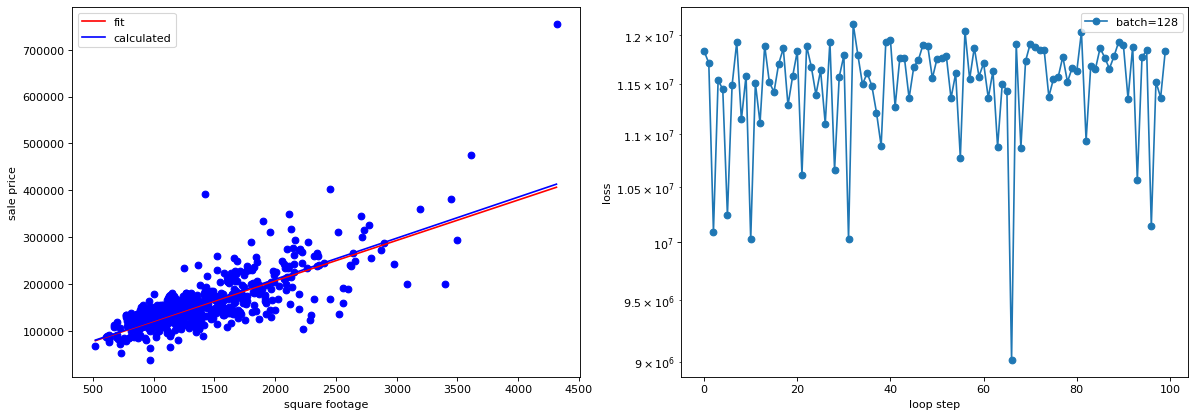

training with batch_size=256, learning_rate_m=1e-07 and learning_rate_b=0.01
3


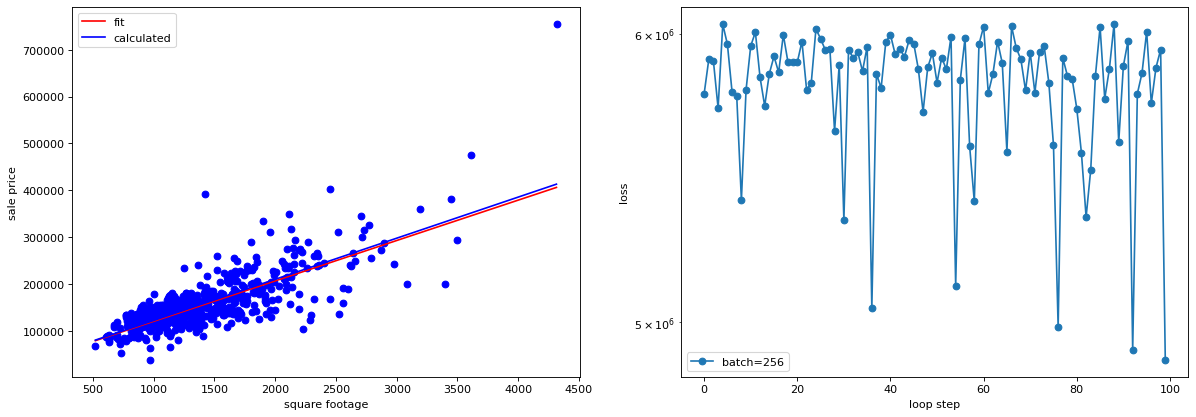

training with batch_size=512, learning_rate_m=1e-07 and learning_rate_b=0.01
2


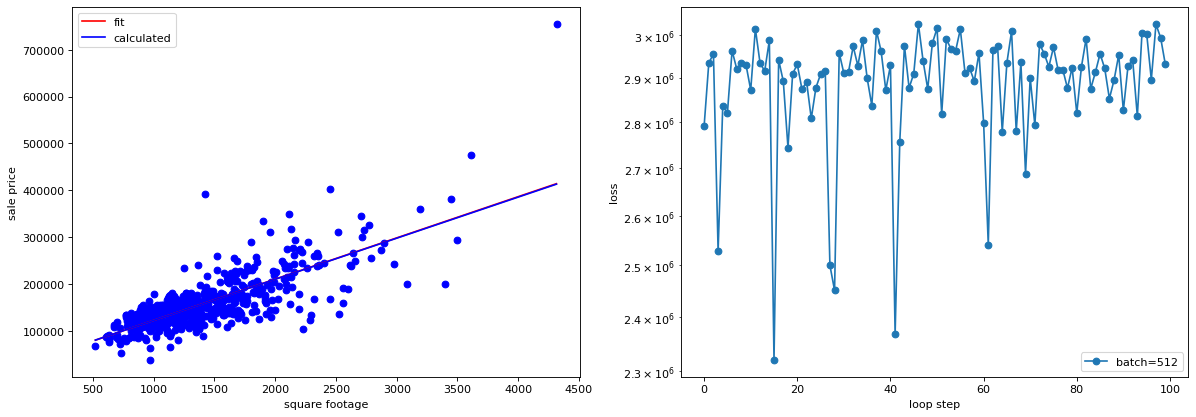

In [16]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-2

loop_N = 100 #num_epochs
for batch_size in 2**np.arange(5, 10):
    loss_history = []
    print(f'training with batch_size={batch_size}, learning_rate_m={learning_rate_m} and learning_rate_b={learning_rate_b}')
    
    # num_batches = len(data)//batch_size
    indices = range(0, len(data), batch_size)
    print(len(indices))
    for _ in range(loop_N):
        shuffled_points = np.random.permutation(np.arange(len(data)))
        # suffled_points = np.arange(len(data))
        X = data['GrLivArea'].to_numpy()[shuffled_points]; Y = data['SalePrice'].to_numpy()[shuffled_points]
        batch_loss = []
        for idx in range(len(indices)-1):
            data_x = X[indices[idx]:indices[idx+1]]; data_y = Y[indices[idx]:indices[idx+1]]
            # update our slope and intercept based on the current values
            m = updated_m(data_x,data_y,m,b,learning_rate_m)
            b = updated_b(data_x,data_y,m,b,learning_rate_b)

            # calculate the loss value
            batch_loss.append(np.mean(loss(data_x,data_y,m,b)))

            # keep a history of our loss values
        loss_history.append(np.mean(batch_loss))

    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    data_x = X; data_y = Y
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-', label=f'batch={batch_size}')
    ax[1].legend()
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
